<a href="https://colab.research.google.com/github/projectwint/practice_AI/blob/main/CNN_test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import numpy as np

image_w = 128
image_h = 128

#이미지 불러오기
X_train, X_test, y_train, y_test = np.load('/content/drive/MyDrive/train_set.npy', allow_pickle=True)
X_train = X_train.astype(float) #type 변환
X_test = X_test.astype(float)

#가중치 계산 (두 데이터의 양이 같지 않으므로 비율을 맞춰줌) - 요건 파이썬 함수 노트 파일 밑에 자세히 따로 적음
w0 = np.mean(y_train) #전체를 1로 볼 때 index 1의 비율
w1 = 1 - w0 #index 0의 비율
class_weights = {0: w0, 1: w1} #가중치로 부여

#CNN에서 컨볼루션 레이어를 거치면 주요 특징만 추출돼서 학습됨.
model = Sequential() #순차 모델 정의
model.add(Conv2D(32, (3, 3), padding = "same", input_shape = (image_w, image_h, 3), activation = "relu"))
#Conv2D를 이용
#3x3 크기의 컨볼루션 레이어를 32개의 필터수만큼 처음에 생성한다.
#입력형태(input_shpae)는 128 x 128이기 때문에 (128, 128, 3)의 tuple 값을 가짐
#활성화 함수는 relu를 사용
model.add(MaxPooling2D(pool_size = (2, 2)))
#MaxPooling2D: 주요값을 뽑아내서 작은 출력값을 만들고, 사소한 변화는 무시한다.

model.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) #특징 맵 평탄화
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid")) #출력 계층 정의

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [3]:
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint

#overfitting 방지 코드
model_dir = '/content/drive/MyDrive/model'

if not os.path.exists(model_dir): #폴더명이 없으면 폴더 생성
    os.mkdir(model_dir)
model_path = model_dir + "/ground_water_classify.model"

checkpoint = ModelCheckpoint(filepath = model_path, monitor = 'val_loss', verbos = 1, save_best_only = True) #val_loss 기준으로 체크(monitor 옵션)
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5) #val_loss값이 5번(epoch 기준) 연속 최저치를 못 찍으면 종료

#model.fit() 결과를 history 변수에 저장(그래프 그리려고)
history = model.fit(X_train, y_train, epochs=100, class_weight = class_weights, batch_size=128, validation_split = 0.20, callbacks = [checkpoint, early_stopping])
#epochs-데이터 전부를 한 번 학습시키는 것을 몇 번 할 건지
#class_weight-가중치
#batch_size-데이터를 어느 정도씩 묶어서 학습시킬 건지(많이 묶으면 [===] 앞에 34/34 적힌 부분의 숫자가 작아지고 적게 묶으면 숫자 커짐)
#validation_spoit-확인용 데이터를 빼놓는 비율. 성능이 어느 정도인지 좋은지 한 epoch가 끝날 때마다 확인하는 용도. 얘로 확인한 값은 'val_' 접두사 붙음.
#callbacks-앞서 한 overfitting 방지 코드에 관련 변수를 집어넣는 옵션

#accuracy는 정확도이므로 높을수록 좋고(최대 1), loss는 정답과 차이가 얼마나 나는지에 대한 수(0.x로 나온 출력에서 0 또는 1로 바꿀 때의 차이를 말하는 듯)이므로 낮을 수록 좋음

Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 29.1632 - accuracy: 0.7467

34/34 [==============================] - 329s 10s/step - loss: 29.1632 - accuracy: 0.7467 - val_loss: 0.5031 - val_accuracy: 0.8429
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 0.1352 - accuracy: 0.8885

34/34 [==============================] - 350s 10s/step - loss: 0.1352 - accuracy: 0.8885 - val_loss: 0.4166 - val_accuracy: 0.8708
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 0.0898 - accuracy: 0.9273

34/34 [==============================] - 327s 10s/step - loss: 0.0898 - accuracy: 0.9273 - val_loss: 0.3724 - val_accuracy: 0.9080
Epoch 4/100
34/34 [==============================] - ETA: 0s - loss: 0.0770 - accuracy: 0.9322

34/34 [==============================] - 329s 10s/step - loss: 0.0770 - accuracy: 0.9322 - val_loss: 0.3579 - val_accuracy: 0.9229
Epoch 5/100
34/34 [==============================] - 341s 10s/step - loss: 0.0686 - accuracy: 0.9398 - val_loss: 0.3645 - val_accuracy: 0.8941
Epoch 6/100
34/34 [==============================] - ETA: 0s - loss: 0.0713 - accuracy: 0.9403

34/34 [==============================] - 328s 10s/step - loss: 0.0713 - accuracy: 0.9403 - val_loss: 0.3120 - val_accuracy: 0.8968
Epoch 7/100
34/34 [==============================] - ETA: 0s - loss: 0.0674 - accuracy: 0.9424

34/34 [==============================] - 326s 10s/step - loss: 0.0674 - accuracy: 0.9424 - val_loss: 0.2928 - val_accuracy: 0.9294
Epoch 8/100
34/34 [==============================] - ETA: 0s - loss: 0.0644 - accuracy: 0.9452

34/34 [==============================] - 329s 10s/step - loss: 0.0644 - accuracy: 0.9452 - val_loss: 0.1807 - val_accuracy: 0.9117
Epoch 9/100
34/34 [==============================] - ETA: 0s - loss: 0.0535 - accuracy: 0.9533

34/34 [==============================] - 341s 10s/step - loss: 0.0535 - accuracy: 0.9533 - val_loss: 0.1800 - val_accuracy: 0.8885
Epoch 10/100
34/34 [==============================] - ETA: 0s - loss: 0.0556 - accuracy: 0.9517

34/34 [==============================] - 319s 9s/step - loss: 0.0556 - accuracy: 0.9517 - val_loss: 0.1780 - val_accuracy: 0.9061
Epoch 11/100
34/34 [==============================] - ETA: 0s - loss: 0.0530 - accuracy: 0.9577

34/34 [==============================] - 324s 10s/step - loss: 0.0530 - accuracy: 0.9577 - val_loss: 0.1759 - val_accuracy: 0.9164
Epoch 12/100
34/34 [==============================] - ETA: 0s - loss: 0.0658 - accuracy: 0.9447

34/34 [==============================] - 327s 10s/step - loss: 0.0658 - accuracy: 0.9447 - val_loss: 0.1613 - val_accuracy: 0.8987
Epoch 13/100
34/34 [==============================] - ETA: 0s - loss: 0.0457 - accuracy: 0.9607

34/34 [==============================] - 323s 9s/step - loss: 0.0457 - accuracy: 0.9607 - val_loss: 0.1512 - val_accuracy: 0.9099
Epoch 14/100
34/34 [==============================] - ETA: 0s - loss: 0.0462 - accuracy: 0.9610

34/34 [==============================] - 320s 9s/step - loss: 0.0462 - accuracy: 0.9610 - val_loss: 0.1476 - val_accuracy: 0.9089
Epoch 15/100
34/34 [==============================] - 330s 10s/step - loss: 0.0365 - accuracy: 0.9707 - val_loss: 0.2093 - val_accuracy: 0.8820
Epoch 16/100
34/34 [==============================] - 320s 9s/step - loss: 0.0586 - accuracy: 0.9496 - val_loss: 0.1858 - val_accuracy: 0.9442
Epoch 17/100
34/34 [==============================] - 336s 10s/step - loss: 0.0571 - accuracy: 0.9538 - val_loss: 0.1603 - val_accuracy: 0.9080
Epoch 18/100
34/34 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9649

34/34 [==============================] - 321s 9s/step - loss: 0.0449 - accuracy: 0.9649 - val_loss: 0.1423 - val_accuracy: 0.9154
Epoch 19/100
34/34 [==============================] - 344s 10s/step - loss: 0.0368 - accuracy: 0.9724 - val_loss: 0.1424 - val_accuracy: 0.9210
Epoch 20/100
34/34 [==============================] - ETA: 0s - loss: 0.0335 - accuracy: 0.9735

34/34 [==============================] - 344s 10s/step - loss: 0.0335 - accuracy: 0.9735 - val_loss: 0.0995 - val_accuracy: 0.9526
Epoch 21/100
34/34 [==============================] - 327s 10s/step - loss: 0.0353 - accuracy: 0.9698 - val_loss: 0.1008 - val_accuracy: 0.9628
Epoch 22/100
34/34 [==============================] - 321s 9s/step - loss: 0.0389 - accuracy: 0.9691 - val_loss: 0.1103 - val_accuracy: 0.9452
Epoch 23/100
34/34 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.9756

34/34 [==============================] - 324s 10s/step - loss: 0.0316 - accuracy: 0.9756 - val_loss: 0.0879 - val_accuracy: 0.9591
Epoch 24/100
34/34 [==============================] - 317s 9s/step - loss: 0.0324 - accuracy: 0.9756 - val_loss: 0.1312 - val_accuracy: 0.9387
Epoch 25/100
34/34 [==============================] - 320s 9s/step - loss: 0.0268 - accuracy: 0.9772 - val_loss: 0.1448 - val_accuracy: 0.9387
Epoch 26/100
34/34 [==============================] - 337s 10s/step - loss: 0.0282 - accuracy: 0.9770 - val_loss: 0.2137 - val_accuracy: 0.9126
Epoch 27/100
34/34 [==============================] - 319s 9s/step - loss: 0.0447 - accuracy: 0.9658 - val_loss: 0.1190 - val_accuracy: 0.9507
Epoch 28/100
34/34 [==============================] - 315s 9s/step - loss: 0.0299 - accuracy: 0.9768 - val_loss: 0.1063 - val_accuracy: 0.9545


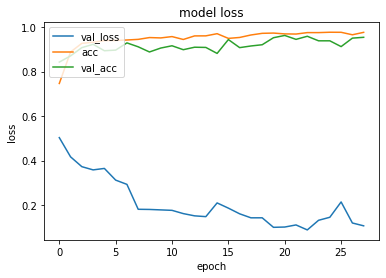

In [4]:
import matplotlib.pyplot as plt
#plt.plot(history.history['loss']) #얘는 원래 있는데 얘 있으면 그래프 진짜 극단적. 근데 지금은 이거 다시 돌리려면 위에 코드부터 돌려야해서 시간 많이 걸림.
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val_loss', 'acc', 'val_acc'], loc = 'upper left')

plt. show()

In [5]:
model.evaluate(X_test, y_test) 
#모델 평가-위의 model.fit()함수에서 validation_split 옵션은 epoch 돌리면서 검사하는 거고 이건 애초에 npy 파일 만들 때 따로 빼놓은 test 데이터들로 평가하는 것

19/19 [==============================] - 11s 604ms/step - loss: 0.1259 - accuracy: 0.9548


[0.12589386105537415, 0.9548494815826416]

In [6]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

import tensorflow as tf

seed = 5
np.random.seed(seed)

caltech_dir = '/content/drive/MyDrive/결과확인용'

image_w = 128
image_h = 128

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir + '/**' + "/*.jpg", recursive=True)

for i , f in enumerate(files):
  img = Image.open(f)
  img = img.convert("RGB")
  img = img.resize((image_w, image_h))
  data = np.asarray(img)

  X.append(data)
  filenames.append(f)

X = np.array(X)
X = X.astype(float)
model = load_model('/content/drive/MyDrive/model/ground_water_classify.model')

prediction = model.predict(X)
np.set_printoptions(formatter = {'float' : lambda x : "{0:0.3f}".format(x)})
cnt = 0

for i in prediction:
  if i >= 0.5:
    print("해당 " + filenames[cnt].split("/")[5] +"/"+ filenames[cnt].split("/")[6] + " 이미지는 땅으로 추정됩니다.")
  else:
    print("해당 " + filenames[cnt].split("/")[5] +"/"+ filenames[cnt].split("/")[6]+ " 이미지는 물로 추정됩니다.")
  cnt += 1


1/1 [==============================] - 0s 298ms/step
해당 water/hans-isaacson-bkrGahiksWg-unsplash.jpg 이미지는 물로 추정됩니다.
해당 water/ivan-bandura-2FEE6BR343k-unsplash.jpg 이미지는 물로 추정됩니다.
해당 water/yang-wewe-SPpnLb94qnE-unsplash.jpg 이미지는 물로 추정됩니다.
해당 water/marissa-rodriguez-2mKYEVGA4jE-unsplash.jpg 이미지는 물로 추정됩니다.
해당 water/gatis-marcinkevics-a5uptAdUmjE-unsplash.jpg 이미지는 물로 추정됩니다.
해당 ground/dark-green-g586548231_640.jpg 이미지는 땅으로 추정됩니다.
해당 ground/engin-akyurt-jiiI9jPr8Dc-unsplash.jpg 이미지는 땅으로 추정됩니다.
해당 ground/dryness-ga02159b2a_640.jpg 이미지는 땅으로 추정됩니다.
해당 ground/giovanna-mDLGemGz-5g-unsplash.jpg 이미지는 땅으로 추정됩니다.
해당 ground/meritt-thomas-nf-f7bihseQ-unsplash.jpg 이미지는 땅으로 추정됩니다.
